In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [4]:
df = pd.read_csv('student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [12]:
df.shape

(395, 33)

Dataset Overview:

- This dataset, curated by P. Cortez and A. Silva (UCI Machine Learning), provides a comprehensive view into the academic and social dynamics of secondary school students. It was collected to investigate student performance in mathematics and Portuguese language courses. The dataset encompasses a wide array of information, ranging from students' demographics to family background and study routines.

Objective:
- The primary objective is to identify influential factors that hold substantial affect on students' final grades. 
- This exploration aims to construct a predictive linear regression model that delineates the intricate relationship between final grades and these significant predictors.

About the dataset:
- The dataset consists 395 observations, each contributing information on 30 distinct variables.
- Demographics: School, Gender (Female or Male), Age (15 to 22 years), Address, Family Size, Parental Cohabitation Status (Living together or Apart)
- Time: Travel Time, Free Time After School, Going Out with Friends, Weekly Study Time
- Family factor: Mother's Education, Father's Education, Mother's Job, Father's Job, Family Relationship Quality, Family Educational Support
- School factor: School Support, Extra Paid Classes, Extra-curricular Activities, Nursery Attendance, Desire for Higher Education, School Absences, Test Failures in the past
- Alcohol assumption during weekday and weekend
- Others: Health Status, Romantic Relationship
- Academic Performance: Final Grades (G1, G2, G3, ranging from 0 to 20)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [28]:
numeric_variables = ['age', 'studytime', 'traveltime', 'goout', 'failures', 'famrel', 'freetime', 'Dalc', 'Walc', 'Medu', 'Fedu', 'absences', 'G1', 'G2', 'G3']

statistics = df[numeric_variables].describe()

# # Add median and mode
# statistics.loc['median'] = df[numeric_variables].median()
# statistics.loc['mode'] = df[numeric_variables].mode().iloc[0]

print(statistics)

              age   studytime  traveltime       goout    failures      famrel  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.035443    1.448101    3.108861    0.334177    3.944304   
std      1.276043    0.839240    0.697505    1.113278    0.743651    0.896659   
min     15.000000    1.000000    1.000000    1.000000    0.000000    1.000000   
25%     16.000000    1.000000    1.000000    2.000000    0.000000    4.000000   
50%     17.000000    2.000000    1.000000    3.000000    0.000000    4.000000   
75%     18.000000    2.000000    2.000000    4.000000    0.000000    5.000000   
max     22.000000    4.000000    4.000000    5.000000    3.000000    5.000000   

         freetime        Dalc        Walc        Medu        Fedu    absences  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.235443    1.481013    2.291139    2.749367    2.521519    5.708861   
std      0.998862    0.8907

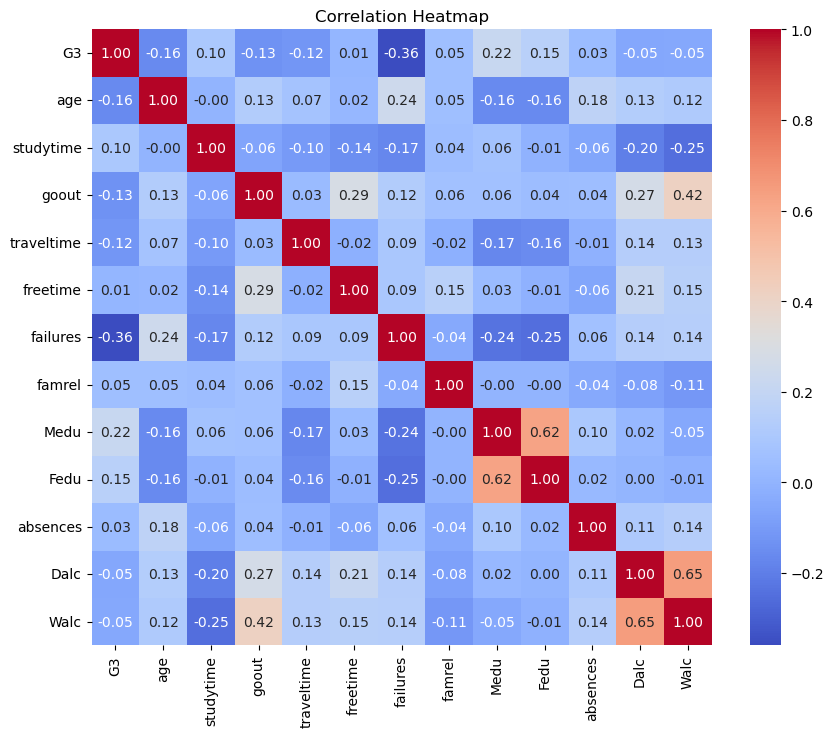

In [29]:
factors = ['G3', 'age', 'studytime', 'goout', 'traveltime', 'freetime','failures', 'famrel', 'Medu', 'Fedu', 'absences', 'Dalc', 'Walc']

plot_data = df[factors]
corr_matrix = plot_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


- There is a strong negative correlation between failures and final grades.
- Failures also a relatively strong negative correlation with both mother and father education levels.
- Mother and father education levels have a notable positive influence on students' final grades.
- Going out frequently is significantly positively correlated with weekend alcohol consumption.
- The alcohol consumption during weekdays and weekends shows a strong correlation with each other.

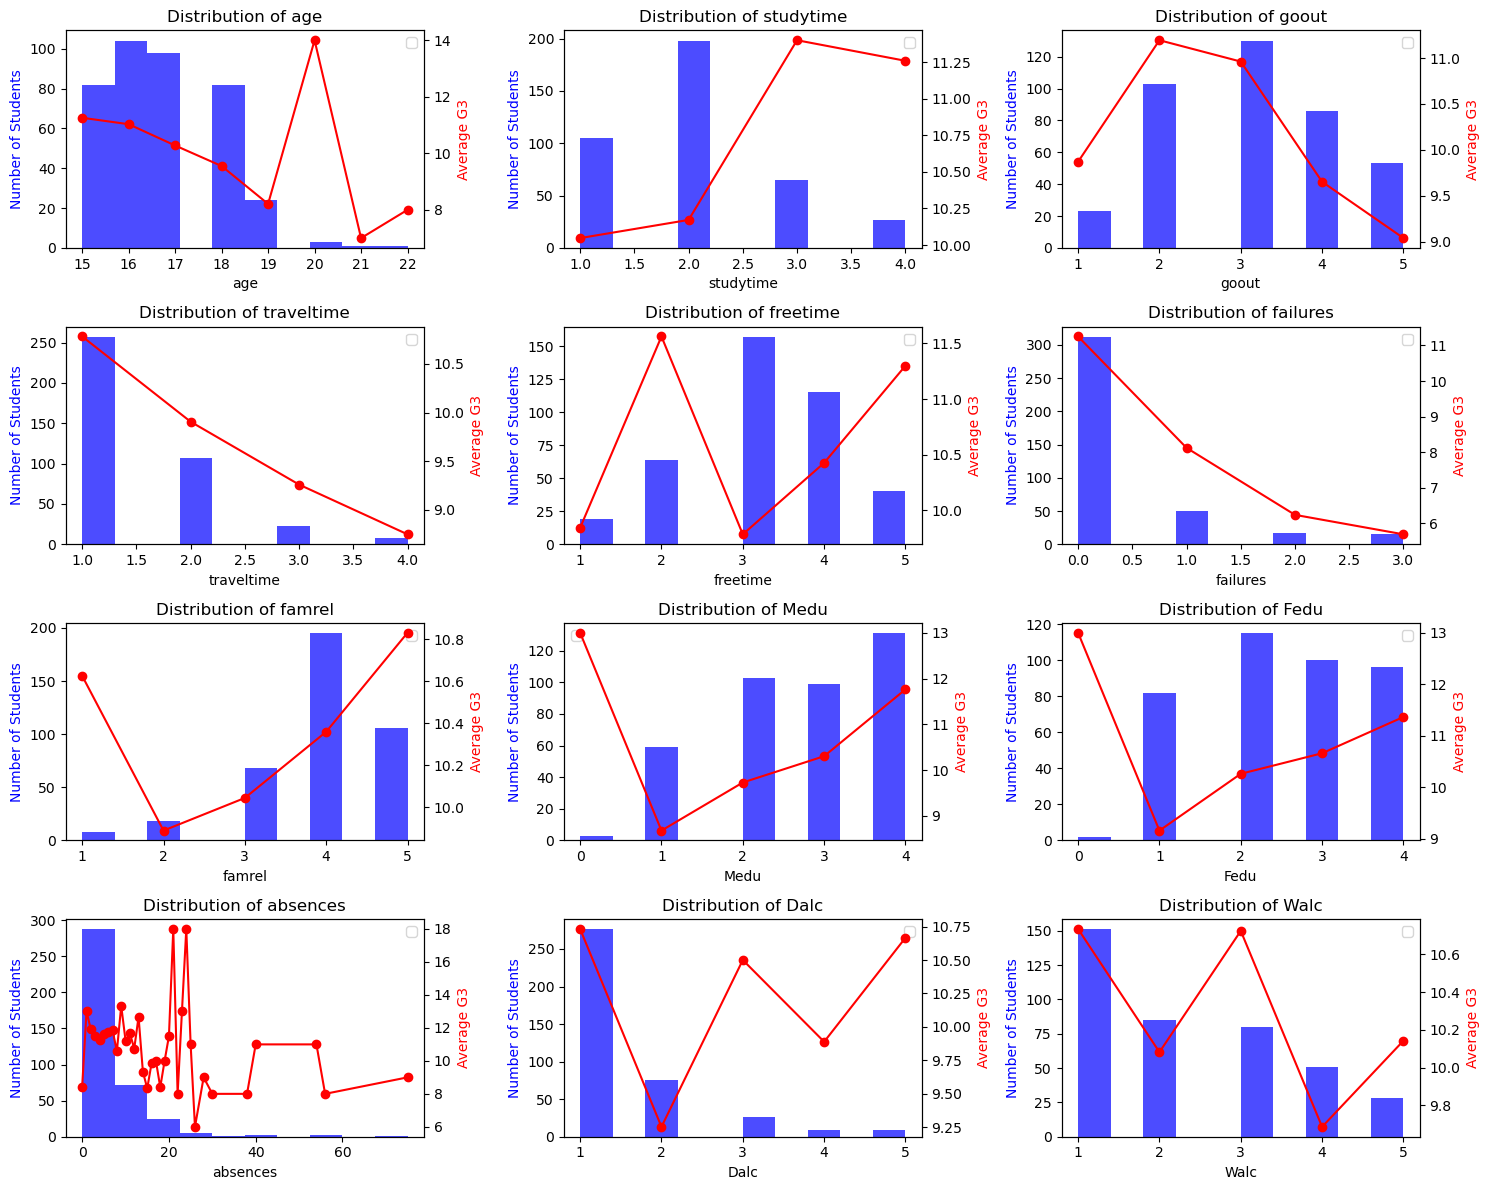

In [30]:
factors = ['age', 'studytime', 'goout', 'traveltime', 'freetime','failures', 'famrel', 'Medu', 'Fedu', 'absences', 'Dalc', 'Walc']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

for i, factor in enumerate(factors):
    # Calculate the average G3 for each factor
    avg_g3_by_factor = df.groupby(factor)['G3'].mean()
    
    # Plot histogram
    ax = axes[i]
    ax.hist(df[factor], bins=10, alpha=0.7, color='b')
    ax.set_xlabel(factor)
    ax.set_ylabel('Number of Students', color='b')
    
    # Plot average G3
    ax2 = ax.twinx()
    ax2.plot(avg_g3_by_factor, color='r', marker='o')
    ax2.set_ylabel('Average G3', color='r')
    # ax2.set_ylim(5, 20)

    
    ax.set_title(f'Distribution of {factor}')
    
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc=0)

plt.tight_layout()
plt.show()


This graph illustrates the relationship between each numeric variable and the final grade. Initial observation from plots:

- Age: The majority of students are aged 15-18, with a few older students (19-22), indicating some students may be re-taking due to failing the test. Older students tend to perform slightly lower in terms of grades.

- Study Time: Most students study for 2-5 hours, achieving an average grade of around 10/20. Those who study more than 5 hours tend to score higher, approximately 11.5 points.

- Going Out: Frequent socializing has a noticeable impact on a student's final grade.

- Travel Time: The majority of students have a commute of less than 30 minutes, with a significant drop in grades for those with longer travel times.

- Failures: Most students have not failed any tests in the past and achieve higher grades than those who have failed at least once.

- Family Factors: Family relationships do not seem to significantly affect students' final grades. However, parental education levels do correlate with higher average final grades, ranging from 9 to 12.

- Free Time, Absences from class, and Alcohol Consumption(both Weekday and Weekend): These factors do not appear to have a clear impact on final grades.

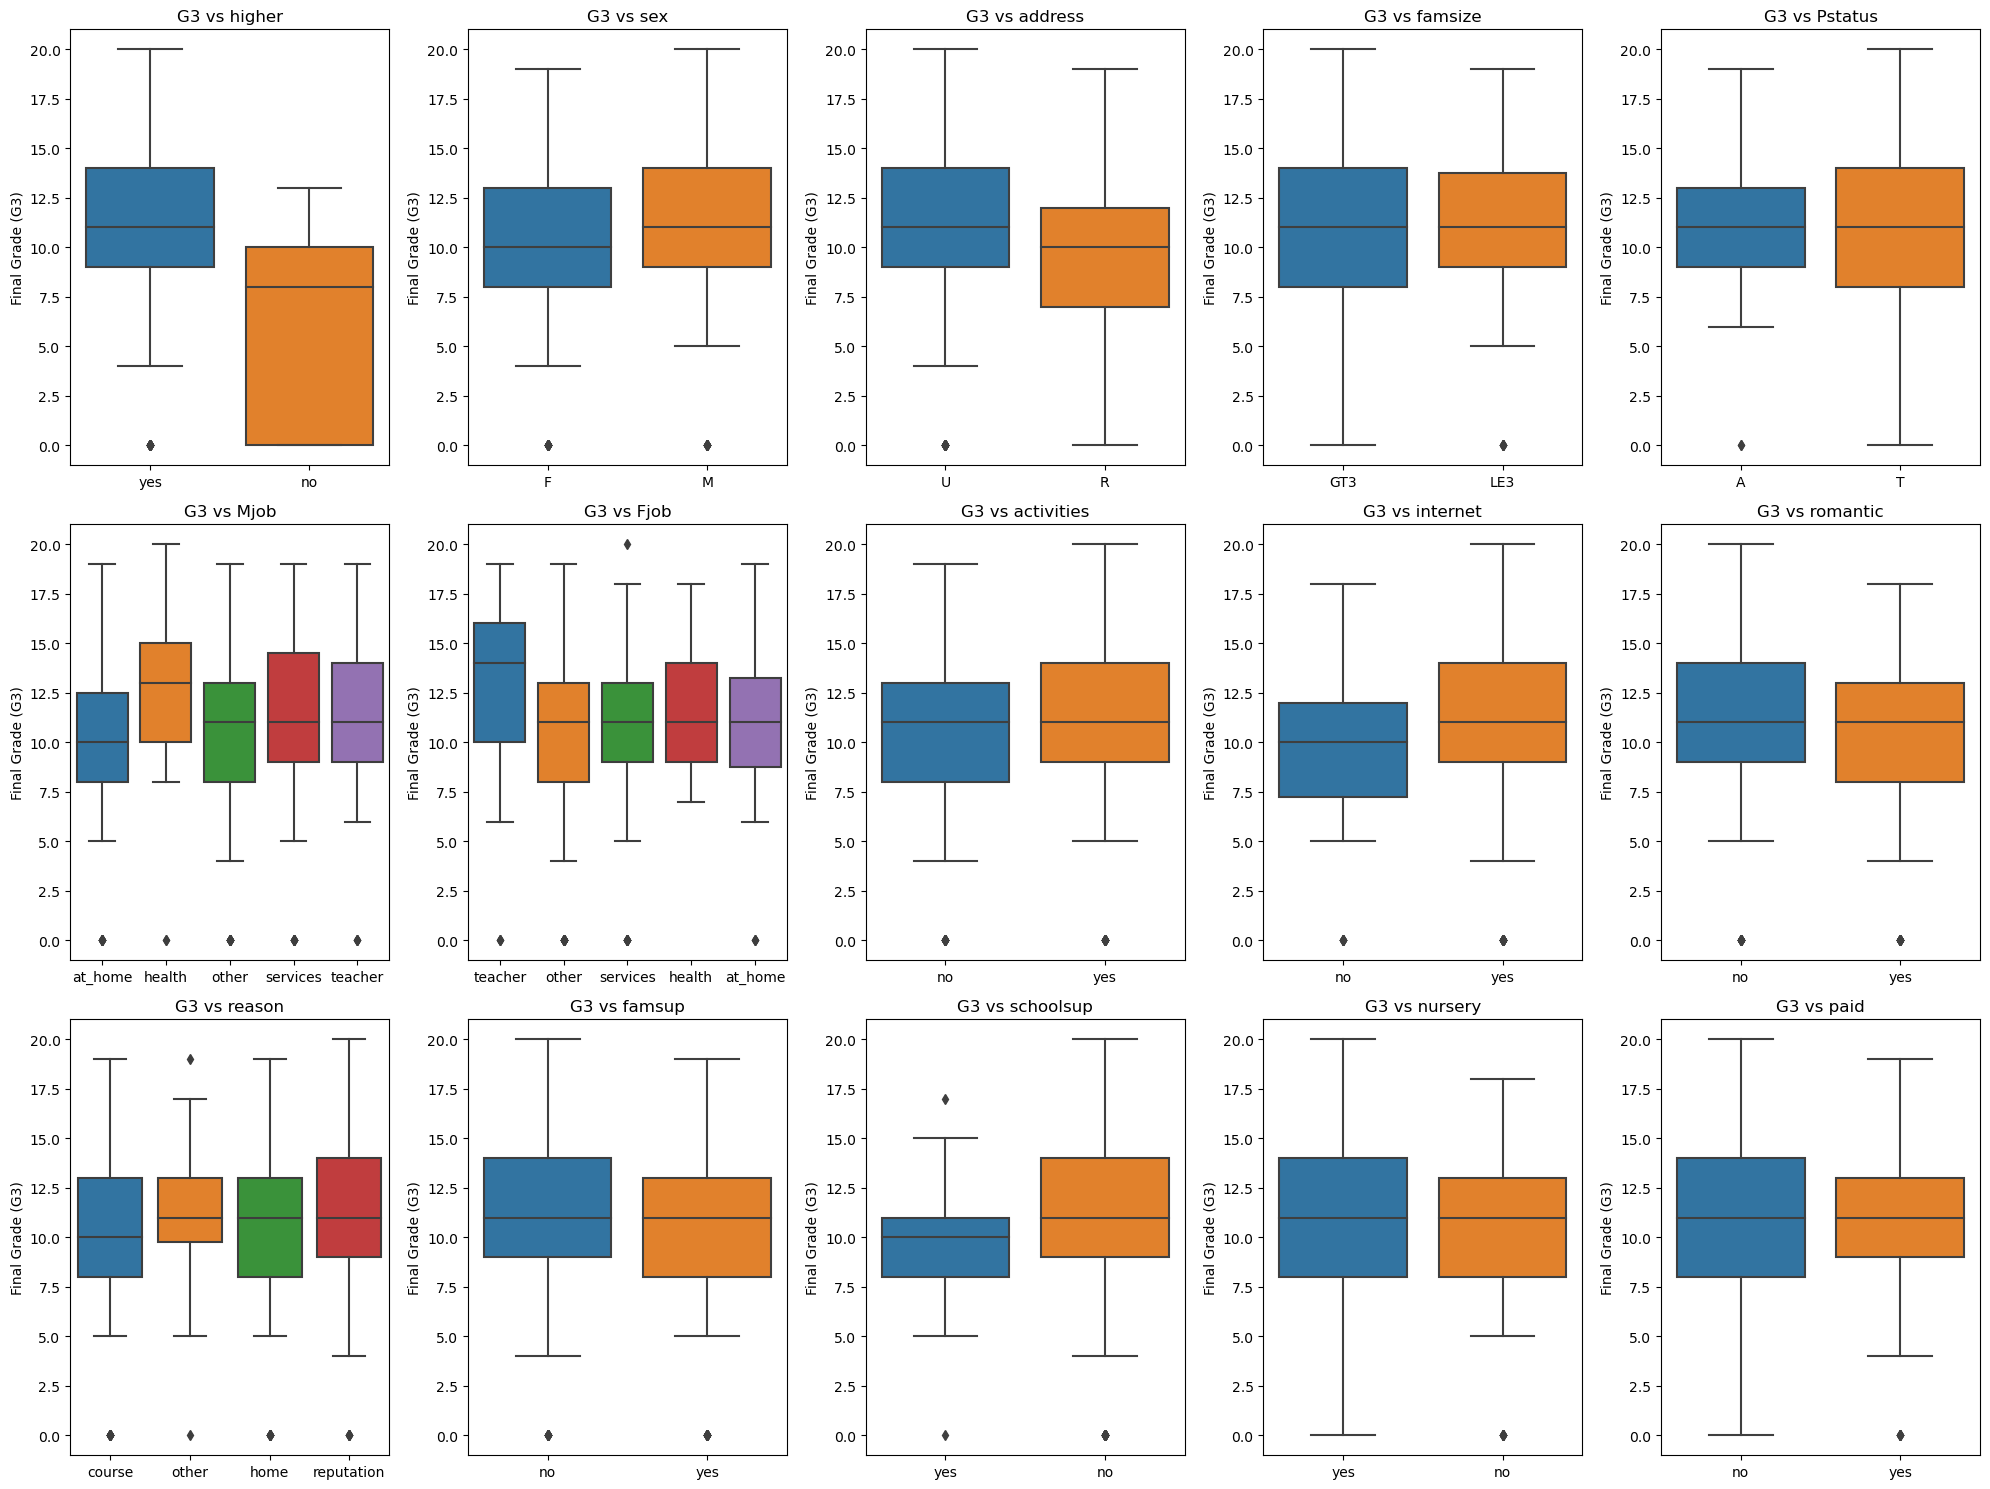

In [31]:

categorical_vars = ['higher', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                    'activities', 'internet', 'romantic', 'reason', 'famsup', 'schoolsup', 'nursery', 'paid']

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20,15))

axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    sns.boxplot(x=var, y='G3', data=df, ax=axes[i])
    axes[i].set_title(f'G3 vs {var}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Final Grade (G3)')


plt.tight_layout()
plt.show()


This box plot illustrates the relationship between categorical variables and final grades. Initial observation from plots:

- Students aspiring for higher education tend to achieve higher grades.

- Urban students demonstrate notably superior performance in terms of both average and extreme grade ranges.

- Belonging to a smaller family where parents cohabitate positively influences a student's academic performance. Additionally, having parents employed as teachers or in the healthcare sector correlates with higher grades.

- Access to the internet is associated with improved student performance.

- Engaging in romantic relationships shows a slight negative effect on students' grades.

- The level of school support seems to have a nuanced impact on grades. It's plausible that students in need of more support, possibly indicating struggling performance, receive additional attention.

- Variables such as family support, the reason for choosing the school, attendance at nursery, and participation in extra paid classes within the course subject do not exhibit a significant impact on final grades.

In [32]:
import scipy.stats as stats

categorical_vars = ['higher', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                    'activities', 'internet', 'romantic', 'reason', 'famsup', 
                    'schoolsup', 'nursery', 'paid']

alpha = 0.05

for var in categorical_vars:
    categories = df[var].unique()
    groups = [df[df[var] == category]['G3'] for category in categories]
    
    f_stat, p_value = stats.f_oneway(*groups)
    
    if p_value < alpha:
        print(f"For '{var}': the p-value {p_value:.4f} -> There is a significant difference in final grades.")
    else:
        print(f"For '{var}': the p-value {p_value:.4f} -> There is NO significant difference in final gradess.")


For 'higher': the p-value 0.0003 -> There is a significant difference in final grades.
For 'sex': the p-value 0.0399 -> There is a significant difference in final grades.
For 'address': the p-value 0.0356 -> There is a significant difference in final grades.
For 'famsize': the p-value 0.1062 -> There is NO significant difference in final gradess.
For 'Pstatus': the p-value 0.2501 -> There is NO significant difference in final gradess.
For 'Mjob': the p-value 0.0052 -> There is a significant difference in final grades.
For 'Fjob': the p-value 0.2683 -> There is NO significant difference in final gradess.
For 'activities': the p-value 0.7497 -> There is NO significant difference in final gradess.
For 'internet': the p-value 0.0505 -> There is NO significant difference in final gradess.
For 'romantic': the p-value 0.0097 -> There is a significant difference in final grades.
For 'reason': the p-value 0.1023 -> There is NO significant difference in final gradess.
For 'famsup': the p-value 0

In [33]:
from scipy.stats import ttest_ind

factors = ['age', 'studytime', 'goout', 'traveltime', 'freetime', 'failures', 
           'famrel', 'Medu', 'Fedu', 'absences', 'Dalc', 'Walc']

alpha = 0.05

for factor in factors:
    group1 = df[df[factor] <= df[factor].median()]['G3']
    group2 = df[df[factor] > df[factor].median()]['G3']
    t_stat, p_value = ttest_ind(group1, group2)
    
    if p_value < alpha:
        print(f"For '{factor}': the p-value {p_value:.4f} -> There is a significant difference in final grades between groups.")
    else:
        print(f"For '{factor}': the p-value {p_value:.4f} -> There is NO significant difference in final grades between groups.")


For 'age': the p-value 0.0035 -> There is a significant difference in final grades between groups.
For 'studytime': the p-value 0.0239 -> There is a significant difference in final grades between groups.
For 'goout': the p-value 0.0014 -> There is a significant difference in final grades between groups.
For 'traveltime': the p-value 0.0297 -> There is a significant difference in final grades between groups.
For 'freetime': the p-value 0.4105 -> There is NO significant difference in final grades between groups.
For 'failures': the p-value 0.0000 -> There is a significant difference in final grades between groups.
For 'famrel': the p-value 0.2761 -> There is NO significant difference in final grades between groups.
For 'Medu': the p-value 0.0000 -> There is a significant difference in final grades between groups.
For 'Fedu': the p-value 0.0109 -> There is a significant difference in final grades between groups.
For 'absences': the p-value 0.1284 -> There is NO significant difference in f

In [19]:
df1 = pd.read_csv("student-mat.csv")
df2 = pd.read_csv("student-por.csv")

In [7]:
df1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [21]:
df1["score"] = (df1['G1']+df1['G2']+df1['G3'])/3

In [9]:
len(df1)

395

In [11]:
df2.shape

(649, 33)

In [38]:
df1[['age','traveltime','studytime','failures','goout','Dalc','Walc','absences','score']].describe()

,age,traveltime,studytime,failures,goout,Dalc,Walc,absences,score
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,1.448101,2.035443,0.334177,3.108861,1.481013,2.291139,5.708861,10.679325
std,1.276043,0.697505,0.839240,0.743651,1.113278,0.890741,1.287897,8.003096,3.696786
min,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.333333
25%,16.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,8.333333
50%,17.000000,1.000000,2.000000,0.000000,3.000000,1.000000,2.000000,4.000000,10.666667
75%,18.000000,2.000000,2.000000,0.000000,4.000000,2.000000,3.000000,8.000000,13.333333
max,22.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,75.000000,19.333333


In [13]:
formula = '''
score ~ C(sex) + age + traveltime + studytime + 
failures + C(schoolsup) + C(romantic) + goout + Dalc + Walc+ absences
'''

<Axes: xlabel='Dalc', ylabel='score'>

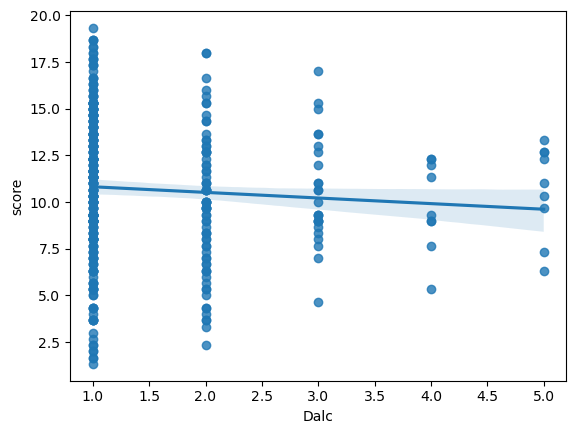

In [14]:
import seaborn as sns

sns.regplot(y="score", x="Dalc", data=df1)

In [41]:
model = smf.ols(formula, data=df1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     9.611
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           2.25e-15
Time:                        12:38:33   Log-Likelihood:                -1028.3
No. Observations:                 395   AIC:                             2081.
Df Residuals:                     383   BIC:                             2128.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              15.0922    

Model DIAGNOSTICS

1. residuals against oreducted:

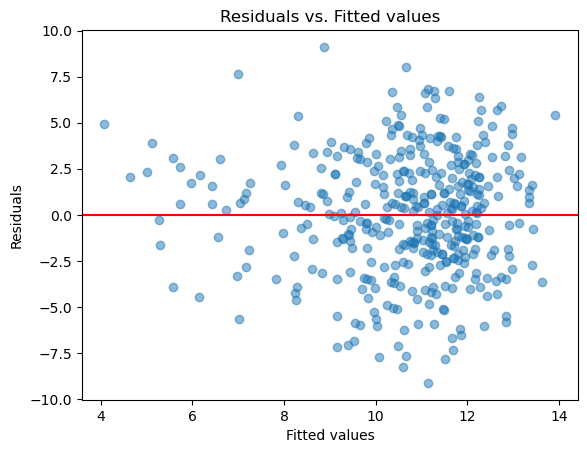

In [42]:
residuals = model.resid
fitted = model.fittedvalues
# Plot the residuals
plt.scatter(fitted, residuals, alpha=0.5)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs. Fitted values')
plt.show()


In [43]:
# Conduct Breusch-Pagan test
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 24.820154609176285),
 ('p-value', 0.009685489907997523),
 ('f-value', 2.334521089405334),
 ('f p-value', 0.008680976790272426)]

The residuals exhibit a pattern of near-perfect heteroscedasticity (the characteristic funnel shape appears to manifests itself in the model residuals). However, the Breusch-Pagan test has a p-value that is approximately 0.0495. Thus, while there is not have sufficient evidence to reject the null-hypothesis of homoscedasticity in the residuals (based on a 95% significance level), the p-value is close to the threshold of statistical significance and the plot reveals a concerning patter. Thus, the model estimates may be unreliable.

### Auto correolation 

The Durbin-Watson statistic of  2.127 is close to 2, which suggests that there's little to no autocorrelation in the residuals.

## Normal porb plot and qq plot

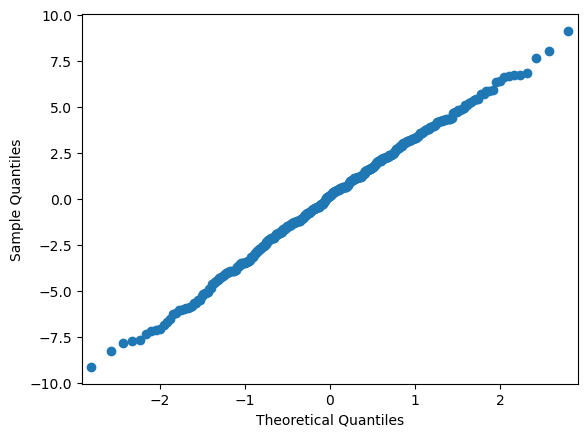

In [44]:
sm.qqplot(model.resid)
from scipy.stats import kstest

In [45]:
kstest(model.resid,'norm')

KstestResult(statistic=0.27433451628474326, pvalue=9.20081747041744e-27, statistic_location=1.535143069111383, statistic_sign=-1)

The Q-Q plot looks reasonably straight, but the two-sided Kolmogorov-Smirnov test yields a test statistic of D = 0.2606 and a p-value of approximately 0. Thus, it may concluded that there is sufficient evidence to suggest that the residuals are not normally distributed. 

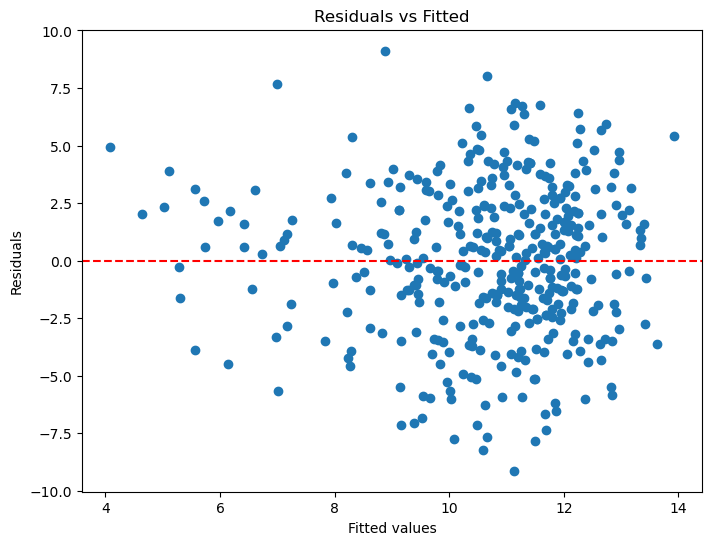

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

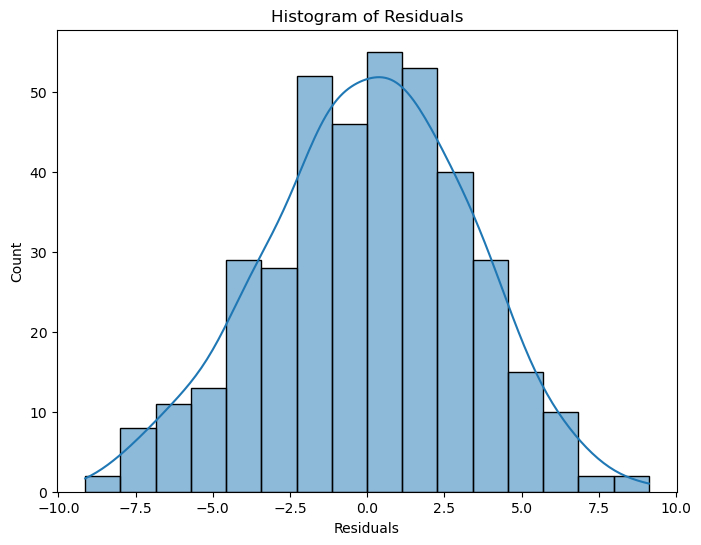

In [47]:
plt.figure(figsize=(8,6))
sns.histplot(model.resid, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices(formula, data=df1, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

    VIF Factor             features
0   215.041468            Intercept
1     1.226789          C(sex)[T.M]
2     1.117425  C(schoolsup)[T.yes]
3     1.066989   C(romantic)[T.yes]
4     1.220138                  age
5     1.037523           traveltime
6     1.183921            studytime
7     1.124897             failures
8     1.235356                goout
9     1.784689                 Dalc
10    2.064111                 Walc
11    1.088431             absences


In [49]:
# he

bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(lzip(labels, bp_test))

[('LM Statistic', 24.820154609176285), ('LM-Test p-value', 0.009685489907997523), ('F-Statistic', 2.334521089405334), ('F-Test p-value', 0.008680976790272426)]


In [50]:
influence = model.get_influence()
studentized_deleted_residuals = influence.resid_studentized_external

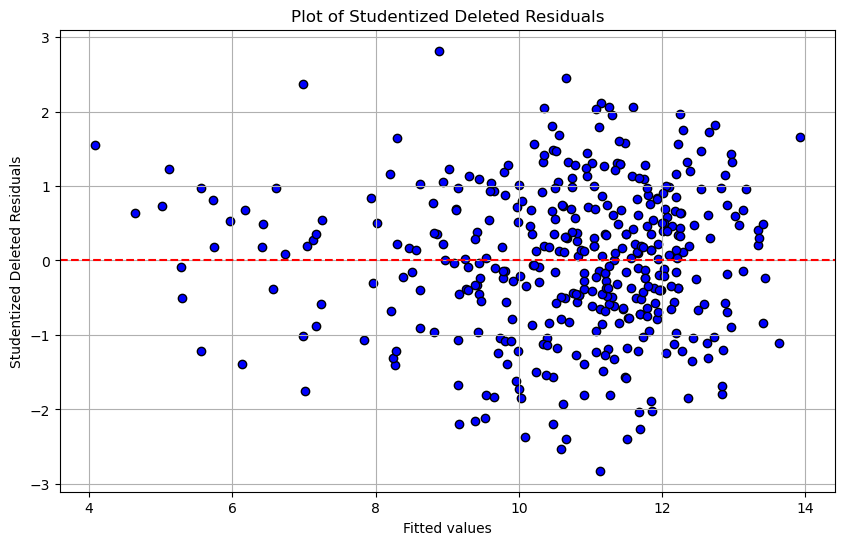

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(model.fittedvalues, studentized_deleted_residuals, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')  # adds a horizontal line at zero
plt.title('Plot of Studentized Deleted Residuals')
plt.xlabel('Fitted values')
plt.ylabel('Studentized Deleted Residuals')
plt.grid(True)
plt.show()

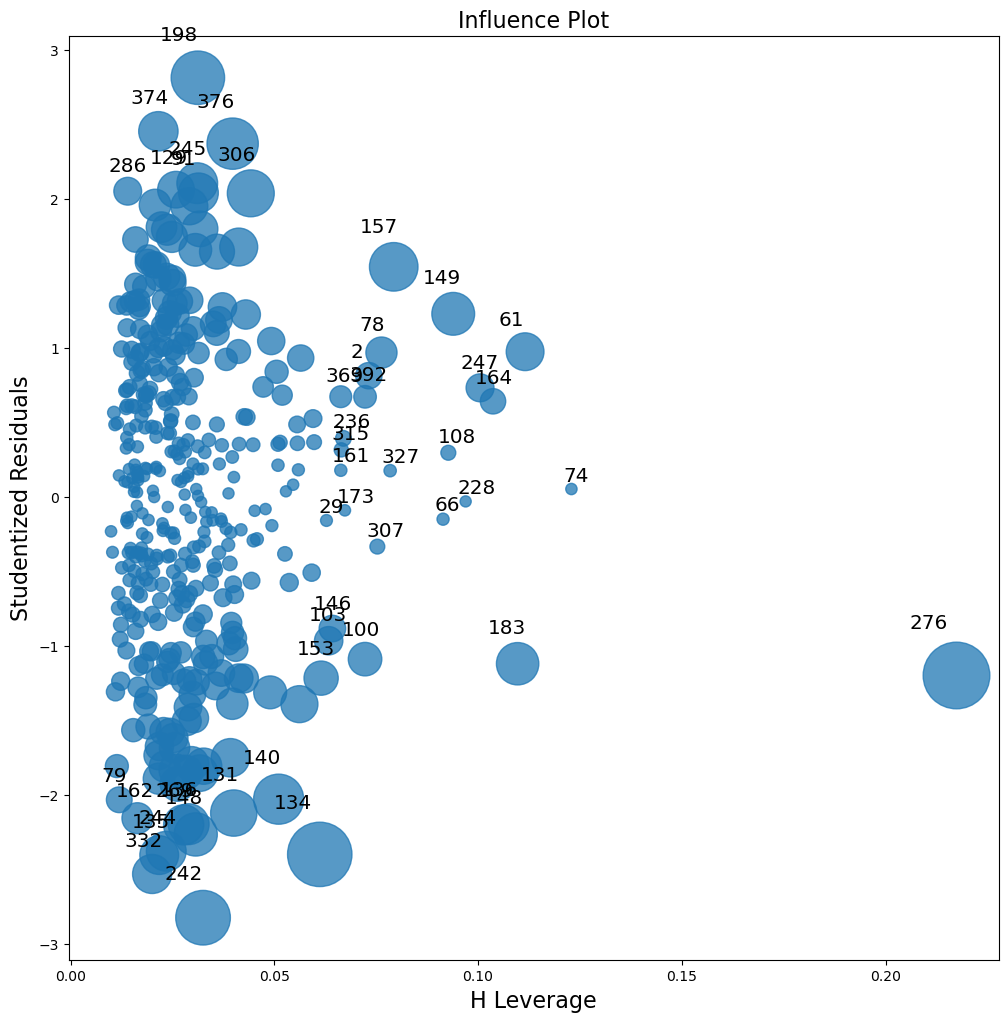

In [52]:
fig, ax = plt.subplots(figsize=(12,12))
fig=sm.graphics.influence_plot(model,ax=ax, criterion="cooks") 

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

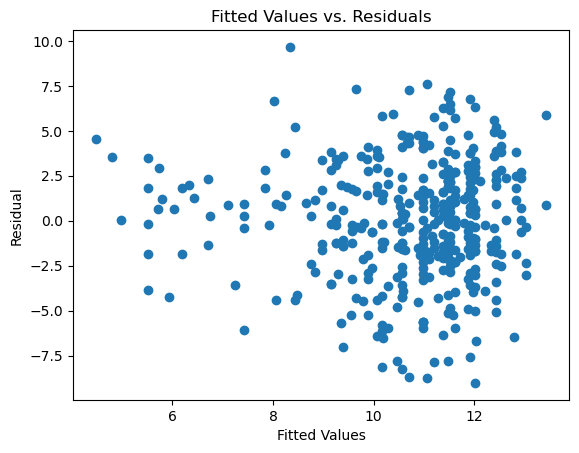

In [49]:
#Heteroscedasticity
#Fitted Values vs. Residuals Plot
p = model.fittedvalues
res = model.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")
#looks bad
#the observations around y=0 is causing a lot of variaty in this data

after generating the plot of residuals vs. fitted value plot, we can see there are some bandwith change, therefore we conclude that there heteroscedasticity exists.


<b>model selection</b>

In [41]:
df1_clean = df1.drop(276)

In [42]:
formula = '''
score ~ C(sex) + studytime + 
failures + C(schoolsup)  + goout 
'''
model = smf.ols(formula, data=df1_clean).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     19.07
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           5.67e-17
Time:                        21:05:21   Log-Likelihood:                -1030.8
No. Observations:                 394   AIC:                             2074.
Df Residuals:                     388   BIC:                             2098.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              11.1881    

In [50]:
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(sex),1.0,54.232487,54.232487,4.870003,2.791245e-02
C(schoolsup),1.0,84.483254,84.483254,7.586480,6.157564e-03
studytime,1.0,161.179308,161.179308,14.473680,1.650700e-04
failures,1.0,683.439101,683.439101,61.371892,4.577151e-14
goout,1.0,78.562977,78.562977,7.054847,8.231118e-03
Residual,388.0,4320.778845,11.136028,NaN,NaN


In [51]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(sex),95.675327,1.0,8.591513,3.577228e-03
C(schoolsup),86.117271,1.0,7.733212,5.685700e-03
studytime,62.120748,1.0,5.578358,1.867695e-02
failures,622.671860,1.0,55.915077,5.092052e-13
goout,78.562977,1.0,7.054847,8.231118e-03
Residual,4320.778845,388.0,NaN,NaN


In [46]:
full_model = smf.ols('score ~ C(sex) + age + traveltime + studytime + failures + C(schoolsup) + C(romantic) + goout + Dalc + Walc+ absences',data=df1_clean).fit()
full_sse = np.sum(full_model.resid ** 2)
n = len(df1_clean)
p = len(full_model.params)
full_mse = full_sse / (n - p)

In [47]:
model = smf.ols(formula,data=df1_clean).fit()
k = len(model.params)
model_sse = np.sum(model.resid**2)
cp = model_sse/full_mse - (n - 2*k)

In [48]:
print(cp)

10.617367500996295


<b>Summary</b>

After conducting a thorough model diagnosis, we identified the presence of heteroscedasticity and influential points in the data. The initial model comprised 11 predictors, namely sex, age, travel time, study time, school support, failures, romantic involvement, Dalc, Walc, absences, and going out.

To address the data issues, we performed t-tests and ANOVA tests. Subsequently, we opted to retain the most significant predictors in the final model, which include sex, school support, study time, failures, and going out. The analysis revealed interesting insights: male students, on average, tend to achieve higher grades than their female counterparts; increased study time positively correlates with higher grades, while failures and going out are associated with lower grades.

One unexpected finding was that students receiving school support exhibited lower grades compared to those without support. This observation suggests a potential explanation: students receiving support may experience a decline in motivation, leading to decreased academic performance.

The chosen performance metric for the model is the adjusted R-squared, which stands at 0.187 in the final model. As part of potential improvements, enlarging the sample size or exploring feature engineering strategies to amalgamate significant predictors could enhance the model's predictive capabilities.

In summary, the refined model provides valuable insights into factors influencing academic performance. The unexpected relationship between school support and lower grades warrants further investigation, highlighting the complex interplay of variables affecting student outcomes. Future work could explore avenues such as increasing the dataset size or refining feature engineering techniques to refine and strengthen the model.